### Gerekli kütüphanelerin eklenmesi

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings 
import tensorflow as tf
from tensorflow.keras.layers import Input , Lambda , Dense ,Flatten , Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101 # ResNet 101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

Num GPUs Available:  1


2022-10-15 18:31:28.539558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-15 18:31:28.637702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-15 18:31:28.638545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


### Verilerin tanımlanması

In [2]:
image_generator = ImageDataGenerator(rescale= 1/255,validation_split = 0)

train_dataset = image_generator.flow_from_directory(batch_size = 16,
                                                   directory= "../input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset",
                                                   shuffle = True,
                                                   target_size=(224,224),
                                                   class_mode="categorical")
image_generator = ImageDataGenerator(rescale= 1/255,validation_split = 0.2)
validation_dataset = image_generator.flow_from_directory(batch_size=16,
                                                 directory='../input/augmented-alzheimer-mri-dataset/OriginalDataset',
                                                 shuffle=True,
                                                 subset = "training",
                                                 target_size=(224,224),
                                                 class_mode='categorical')

submission = image_generator.flow_from_directory(directory='../input/augmented-alzheimer-mri-dataset/OriginalDataset',
                                                 shuffle=False,
                                                 subset="validation",
                                                 target_size=(224,224), 
                                                 class_mode=None)




Found 33984 images belonging to 4 classes.
Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


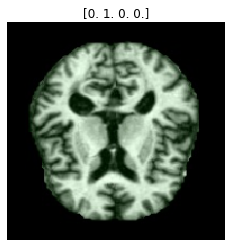

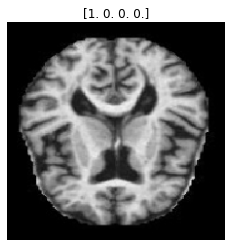

In [3]:
#show flwoers for the first batch

batch_1_img = train_dataset[0]
for i in range(0,2):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

In [4]:
#resnet50
#REsNext
#convnext
#xception
model_resnet50 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in model_resnet50.layers:
    layer.trainable = False
x = Flatten()(model_resnet50.output)

prediction = Dense(4,activation = "softmax")(x)

model_resnet50 = Model(inputs=model_resnet50.input, outputs=prediction)

model_resnet50.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc'),'acc'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)
model_resnet50.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)

2022-10-15 18:31:56.109234: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-15 18:31:56.109630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-15 18:31:56.110464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-15 18:31:56.111101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

94781440/94765736 [==============================] - 1s 0us/step


2022-10-15 18:32:01.051162: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-10-15 18:32:05.926402: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2124/2124 [==============================] - 246s 111ms/step - loss: 1.5278 - auc: 0.7549 - acc: 0.4982 - val_loss: 0.7222 - val_auc: 0.9066 - val_acc: 0.6739
Epoch 2/50
2124/2124 [==============================] - 109s 51ms/step - loss: 1.3282 - auc: 0.8203 - acc: 0.5739 - val_loss: 1.1430 - val_auc: 0.8265 - val_acc: 0.5739
Epoch 3/50
2124/2124 [==============================] - 104s 49ms/step - loss: 1.2678 - auc: 0.8437 - acc: 0.6057 - val_loss: 1.0711 - val_auc: 0.8618 - val_acc: 0.5897
Epoch 4/50
2124/2124 [==============================] - 104s 49ms/step - loss: 1.2178 - auc: 0.8584 - acc: 0.6314 - val_loss: 1.5563 - val_auc: 0.8404 - val_acc: 0.5124
Epoch 5/50
2124/2124 [==============================] - 103s 49ms/step - loss: 1.1500 - auc: 0.8722 - acc: 0.6503 - val_loss: 1.0206 - val_auc: 0.8817 - val_acc: 0.6264
Epoch 6/50
2124/2124 [==============================] - 108s 51ms/step - loss: 1.1040 - auc: 0.8801 - acc: 0.6635 - val_loss: 0.9571 - val_auc: 0.8882 - val_acc: 0.6